In [2]:
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Add the parent directory to sys.path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from src.io_data_model import (
    load_and_dateindex_data,
)

from src.transformation import (
    clean_production_data,
)

In [4]:
from yellow_maize_area_parms import config

CROP = config["CROP"]
DATA_FILE = config["DATA_FILE"]
DATA_FILE_PATH = config["DATA_FILE_PATH"]
MODEL_FILE = config["MODEL_FILE"]
MODEL_PATH = config["MODEL_PATH"]
TARGET_VARIABLE = config["TARGET_VARIABLE"]
YEAR = config["YEAR"]

In [5]:
indexed_df = load_and_dateindex_data(DATA_FILE_PATH, DATA_FILE)
cleaned_df = clean_production_data(indexed_df, TARGET_VARIABLE, CROP, YEAR)
cleaned_df.tail(9)

,Province,Area (Hectares)
Date,,
2024-01-01,Limpopo,15000
2024-01-01,Mpumalanga,360000
2024-01-01,Kwazulu-Natal,67000
2024-01-01,Eastern Cape,27000
2024-01-01,Free State,415000
2024-01-01,Northern Cape,42000
2024-01-01,Western Cape,3000
2024-01-01,Gauteng,62000
2024-01-01,North West,90000


In [6]:
# Get summary statistics
cleaned_df.describe().map(lambda x: f"{x:,.0f}")

,Area (Hectares)
count,324
mean,"131,068"
std,"162,494"
min,"1,000"
25%,"15,000"
50%,"48,000"
75%,"252,500"
max,"608,000"


<Axes: xlabel='Date', ylabel='Area (Hectares)'>

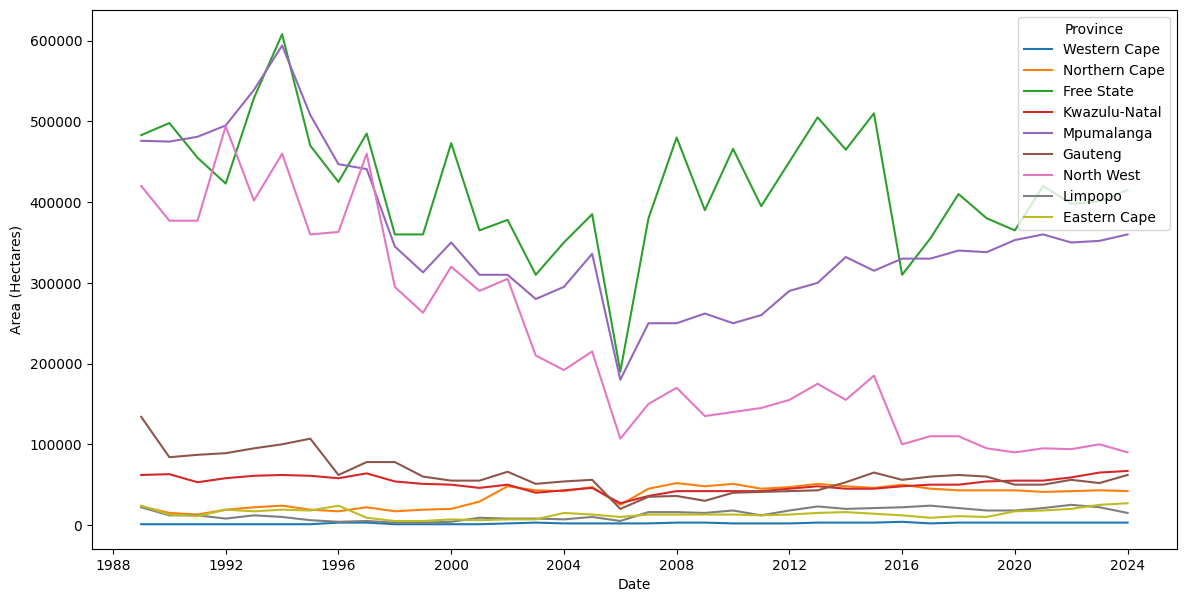

In [7]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y=TARGET_VARIABLE, hue="Province")

In [8]:
# Calculate the 2-year, 3-year, and 5-year rolling sums
cleaned_df["2-Year Average"] = cleaned_df.groupby("Province")[
    TARGET_VARIABLE
].transform(lambda x: x.rolling(window=2, min_periods=1).mean())
cleaned_df["3-Year Average"] = cleaned_df.groupby("Province")[
    TARGET_VARIABLE
].transform(lambda x: x.rolling(window=3, min_periods=1).mean())
cleaned_df["5-Year Average"] = cleaned_df.groupby("Province")[
    TARGET_VARIABLE
].transform(lambda x: x.rolling(window=5, min_periods=1).mean())

# Display the dataframe with the new columns
cleaned_df[cleaned_df["Province"] == "Free State"].tail()

,Province,Area (Hectares),2-Year Average,3-Year Average,5-Year Average
Date,,,,,
2020-01-01,Free State,365000,372500.0,385000.000000,364000.0
2021-01-01,Free State,420000,392500.0,388333.333333,386000.0
2022-01-01,Free State,398000,409000.0,394333.333333,394600.0
2023-01-01,Free State,401000,399500.0,406333.333333,392800.0
2024-01-01,Free State,415000,408000.0,404666.666667,399800.0


<Axes: xlabel='Date', ylabel='2-Year Average'>

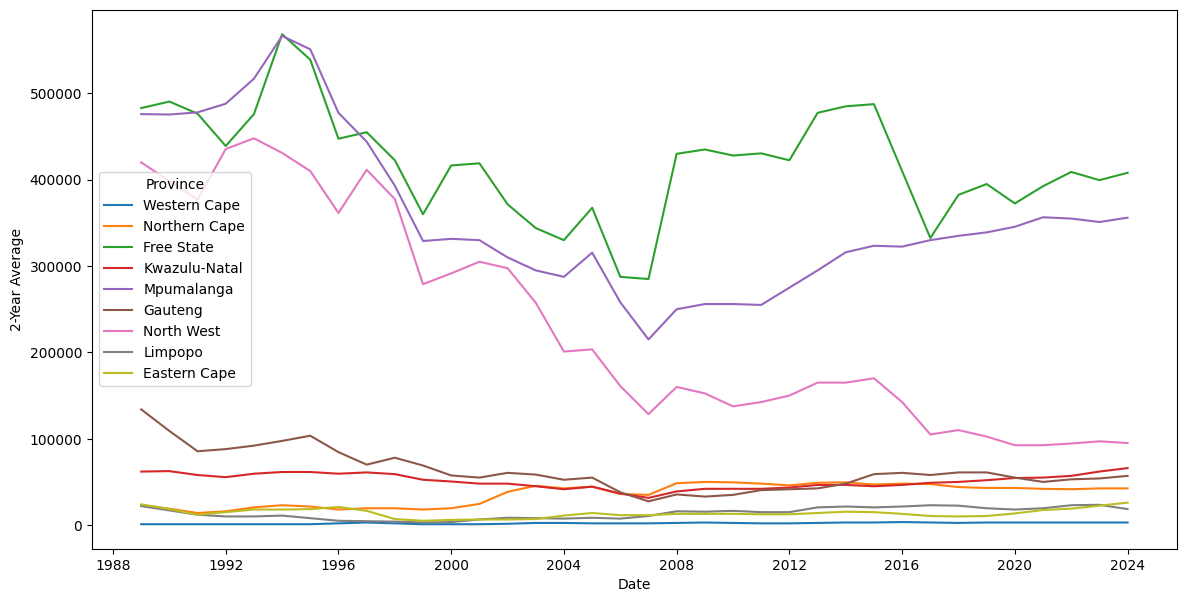

In [9]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y="2-Year Average", hue="Province")

<Axes: xlabel='Date', ylabel='3-Year Average'>

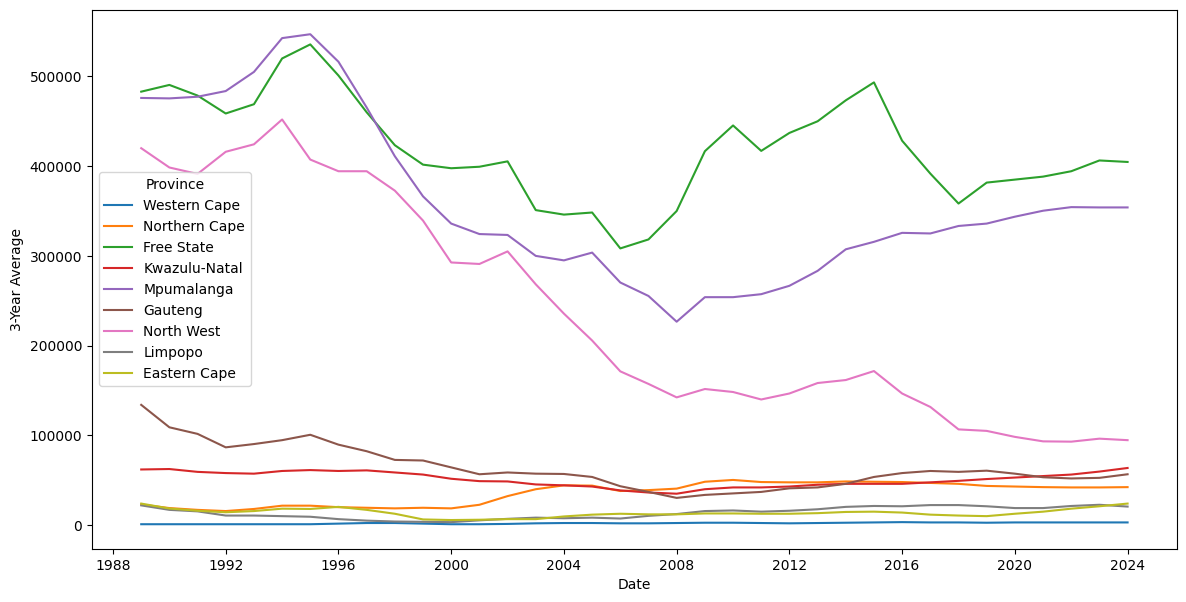

In [10]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y="3-Year Average", hue="Province")

<Axes: xlabel='Date', ylabel='5-Year Average'>

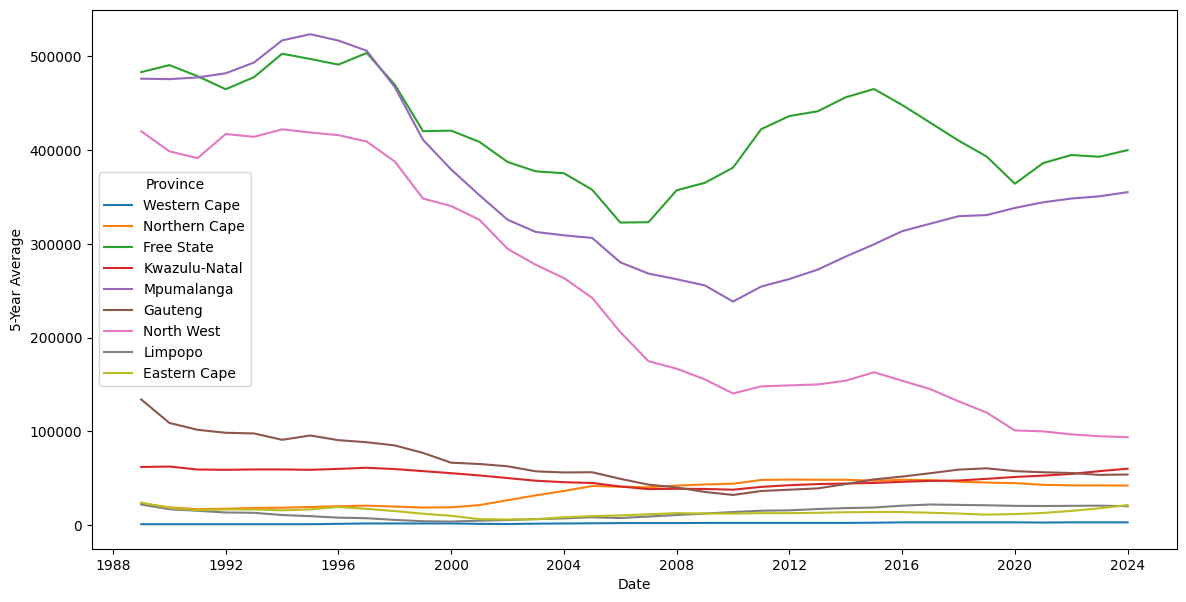

In [11]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=cleaned_df, x=cleaned_df.index, y="5-Year Average", hue="Province")

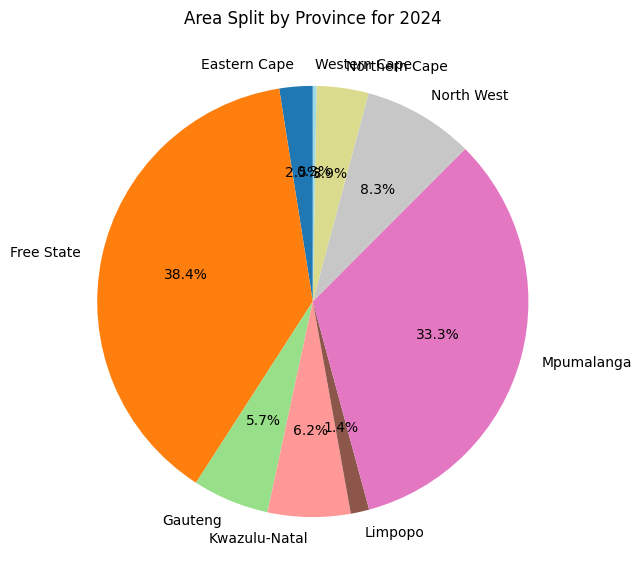

In [12]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")[TARGET_VARIABLE].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Area Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

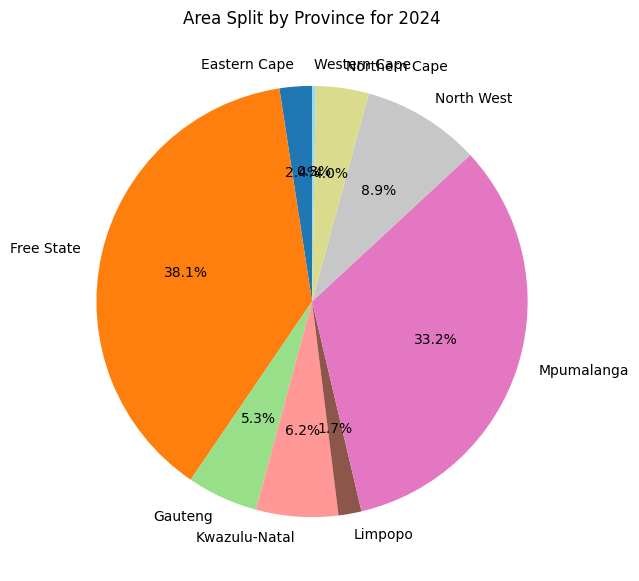

In [13]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["2-Year Average"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Area Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

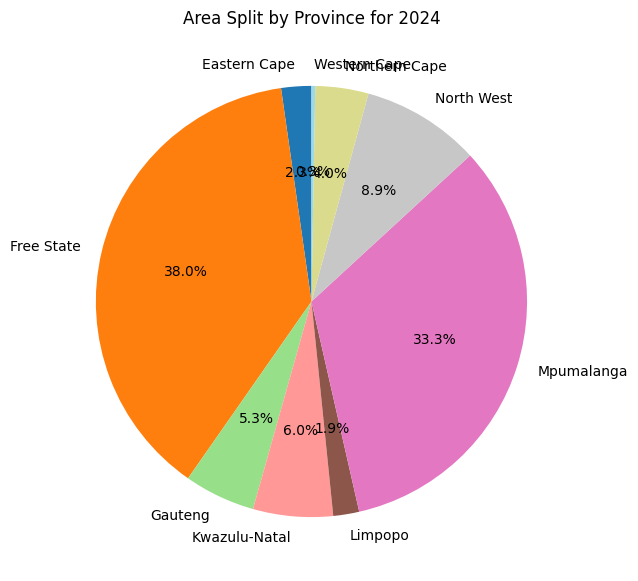

In [14]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["3-Year Average"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Area Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

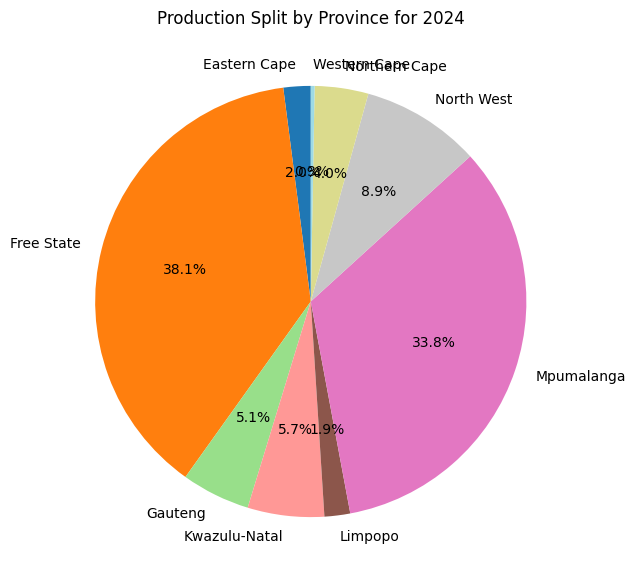

In [15]:
# Filter the latest year's data
latest_year_data = cleaned_df.loc[cleaned_df.index.year == cleaned_df.index.max().year]

# Group by province and sum the production
latest_year_production = latest_year_data.groupby("Province")["5-Year Average"].sum()

# Plot the pie chart
plt.figure(figsize=(10, 7))
latest_year_production.plot.pie(
    autopct="%1.1f%%", startangle=90, cmap="tab20", legend=False
)
plt.title(f"Production Split by Province for {cleaned_df.index.max().year}")
plt.ylabel("")  # Hide the y-label
plt.show()

In [16]:
chosen_splits_df = cleaned_df[cleaned_df.index.year == YEAR][
    ["Province", "2-Year Average"]
]
chosen_splits_df.rename(columns={"2-Year Average": "Area (Hectares)"}, inplace=True)
chosen_splits_df

,Province,Area (Hectares)
Date,,
2024-01-01,Limpopo,18500.0
2024-01-01,Mpumalanga,356000.0
2024-01-01,Kwazulu-Natal,66000.0
2024-01-01,Eastern Cape,26000.0
2024-01-01,Free State,408000.0
2024-01-01,Northern Cape,42500.0
2024-01-01,Western Cape,3000.0
2024-01-01,Gauteng,57000.0
2024-01-01,North West,95000.0


In [17]:
os.chdir(MODEL_PATH)
chosen_splits_df.to_excel(f"{MODEL_FILE}.xlsx")